<a href="https://colab.research.google.com/github/LeoGsilva0518/Learing_DataScience/blob/main/Tarefa_Trilha4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trilha 4: Tarefa (Peso 3)**

Aqui você vai empregar os conhecimentos aprendidos de Python para efetuar sua própria Análise de Dados. Empregue bases de dados extraídas de um ou ambos os sites abaixo:  

a. https://wid.world/

b. https://www.gapminder.org/

O emprego de uma base formada por dados de ambos os sites é bastante enriquecedor mas não é obrigatório. Você pode empregar uma ou mais bases de um único site e deixar para estudar mais adiante merges e joins de tabelas com R. 

Faça uma Análise Exploratória dos Dados (EDA) com dados de seu interesse, empregando o Python e o que você aprendeu até aqui. Os sites apresentam diversos dados sobre as diferenças de desenvolvimento dos países e a desigualdade. Foque em perguntas que são do seu interesse sobre os dados.  

Na sua análise você deve responder ao menos quatro perguntas relevantes sobre os dados, incluir na sua análise seleções e visualizações dos dados e um texto de conclusão a cada pergunta.  

Peça ao professor modelos de código para sua implementação. 

Seu código deve ser minimamente claro e organizado. Não são necessários comentários detalhados, mas deixe claro no seu código cada parte (atividade), cada fase realizada e a resposta final com sua conclusão.  

 Entrega:  

.pdf de print do seu notebook Python. 

Compartilhe o endereço do seu notebook Python (Google Drive ou GitHub) 100% executável para abertura no Google Colab.  

Não deixe de incluir o seu texto uma introdução justificando a escolha da análise e ao final suas conclusões. 



# **Population growth (annual %)**
Derived from total population. Population source: ( 1 ) United Nations Population Division. World Population Prospects: 2019 Revision, ( 2 ) Census reports and other statistical publications from national statistical offices, ( 3 ) Eurostat: Demographic Statistics, ( 4 ) United Nations Statistical Division. Population and Vital Statistics Reprot ( various years ), ( 5 ) U.S. Census Bureau: International Database, and ( 6 ) Secretariat of the Pacific Community: Statistics and Demography Programme.


# **CO2 Emissions (tones per person)**
## **Carbon Dioxide Information Analysis Center**

ESS-DIVE CDIAC Data Transition
The CDIAC data archive ceases operation at the end of September 2017. The data collected over 30 years of operation are transitioning to new archives. The U.S. Department of Energy’s (DOE) Environmental System Science Data Infrastructure for a Virtual Ecosystem (ESS-DIVE) archive is managing the transition. During the transition, this version of the CDIAC website provides access to the CDIAC data. ESS-DIVE is maintained by the Lawrence Berkeley National Laboratory and supported by the DOE’s Office of Science Biological and Environmental Research program (BER). If you have any questions about ESS-DIVE or the data transition, please contact ess-dive-support@lbl.gov or see http://ess-dive.lbl.gov.



In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
#Obtendo dados
population = pd.read_csv('https://raw.githubusercontent.com/LeoGsilva0518/Learing_DataScience/main/population_growth_annual_percent.csv')
population.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,2.24,1.43,0.824,0.58,0.574,0.6,0.591,0.572,0.61,...,0.378,0.503,0.583,0.591,0.541,0.503,0.472,0.459,0.437,0.428
1,Afghanistan,1.9,1.97,2.03,2.09,2.15,2.17,2.19,2.25,2.38,...,3.14,3.41,3.49,3.36,3.08,2.78,2.55,2.38,2.31,2.3
2,Angola,1.39,1.38,1.26,0.974,0.618,0.186,−0.119,−0.0427,0.548,...,3.63,3.6,3.55,3.5,3.44,3.38,3.32,3.28,3.24,3.22
3,Albania,3.12,3.06,2.95,2.88,2.75,2.63,2.63,2.84,2.9,...,−0.269,−0.165,−0.183,−0.207,−0.291,−0.16,−0.092,−0.247,−0.426,−0.574
4,Andorra,6.97,6.73,6.47,6.25,5.98,5.78,5.52,5.28,5.19,...,−0.839,−1.59,−2.03,−1.95,−1.55,−0.899,−0.386,0.0143,0.179,0.154


In [28]:
population.country

0             Aruba
1       Afghanistan
2            Angola
3           Albania
4           Andorra
           ...     
212           Samoa
213           Yemen
214    South Africa
215          Zambia
216        Zimbabwe
Name: country, Length: 217, dtype: object

In [29]:
urban=pd.read_csv('https://raw.githubusercontent.com/LeoGsilva0518/Learing_DataScience/main/urban_population.csv')
urban.head()

,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,27.5k,28.1k,28.5k,28.8k,28.9k,29.1k,29.2k,29.4k,29.6k,...,43.8k,44.1k,44.4k,44.7k,45k,45.3k,45.6k,45.9k,46.3k,46.7k
1,Afghanistan,756k,796k,839k,885k,934k,986k,1.04M,1.1M,1.16M,...,7.21M,7.53M,7.87M,8.2M,8.54M,8.85M,9.16M,9.48M,9.8M,10.1M
2,Angola,569k,597k,628k,660k,692k,722k,750k,776k,804k,...,14.7M,15.4M,16.1M,16.9M,17.7M,18.5M,19.3M,20.2M,21.1M,22M
3,Albania,494k,514k,531k,548k,565k,582k,599k,617k,636k,...,1.55M,1.58M,1.6M,1.63M,1.65M,1.68M,1.71M,1.73M,1.75M,1.76M
4,Andorra,7840,8770,9760,10.8k,11.9k,13.1k,14.3k,15.5k,16.8k,...,74.3k,73.1k,71.5k,70.1k,68.9k,68.2k,67.9k,67.8k,67.9k,67.9k


In [30]:
#verificando a quantidade de colunas.
population.index

RangeIndex(start=0, stop=217, step=1)

In [31]:
#verificando a quantidade de colunas.
urban.index

RangeIndex(start=0, stop=215, step=1)

In [32]:
population.dtypes

country    object
1960       object
1961       object
1962       object
1963       object
            ...  
2015       object
2016       object
2017       object
2018       object
2019       object
Length: 61, dtype: object

Verificando os tipos de dados da tabela Urban.


In [33]:
urban.dtypes

country    object
1959       object
1960       object
1961       object
1962       object
            ...  
2015       object
2016       object
2017       object
2018       object
2019       object
Length: 62, dtype: object

Os dados coletados nas tabeleas *urban* e *population* são do tipo string, sendo necessario conversão para o formato para manibulação númerica.

# **Convertendo datatypes - Tabela Urban**



In [34]:
urban_copy = urban.copy()

Iremos converter os 5 ultimos anos de dados (2015 ao 2019)

In [35]:
urban.index

RangeIndex(start=0, stop=215, step=1)

In [36]:
#Convertendo coluna 2019
urban_2019 = (urban_copy['2019'].replace(r'[kM]+$', '', regex=True).astype(float) * \
              urban_copy['2019'].str.extract(r'[\d\.]+([kM]+)', expand=False)
                .fillna(1)
                .replace(['k','M'], [10**3, 10**6]).astype(int))


#Convertendo coluna 2018
urban_2018 = (urban_copy['2018'].replace(r'[kM]+$', '', regex=True).astype(float) * \
              urban_copy['2018'].str.extract(r'[\d\.]+([kM]+)', expand=False)
                .fillna(1)
                .replace(['k','M'], [10**3, 10**6]).astype(int))


#Convertendo coluna 2017
urban_2017 = (urban_copy['2017'].replace(r'[kM]+$', '', regex=True).astype(float) * \
              urban_copy['2017'].str.extract(r'[\d\.]+([kM]+)', expand=False)
                .fillna(1)
                .replace(['k','M'], [10**3, 10**6]).astype(int))



#Convertendo coluna 2016
urban_2016 = (urban_copy['2016'].replace(r'[kM]+$', '', regex=True).astype(float) * \
              urban_copy['2016'].str.extract(r'[\d\.]+([kM]+)', expand=False)
                .fillna(1)
                .replace(['k','M'], [10**3, 10**6]).astype(int))


#Convertendo coluna 2015
urban_2015 = (urban_copy['2015'].replace(r'[kM]+$', '', regex=True).astype(float) * \
              urban_copy['2015'].str.extract(r'[\d\.]+([kM]+)', expand=False)
                .fillna(1)
                .replace(['k','M'], [10**3, 10**6]).astype(int))



In [37]:
urban_2019

0         46700.0
1      10100000.0
2      22000000.0
3       1760000.0
4         67900.0
          ...    
210       35500.0
211    11300000.0
212    39900000.0
213     8200000.0
214     4790000.0
Name: 2019, Length: 215, dtype: float64

Crindo listas dos 6 colunas utilizadas

In [38]:
#urban_2019 = urban_2019.tolist()
#urban_2018 = urban_2018.tolist()
#urban_2017 = urban_2017.tolist()
#urban_2016 = urban_2016.tolist()
#urban_2015 = urban_2015.tolist()

#Country = urban.country.tolist()

In [39]:
Country = urban.country.tolist()

# Criando um dataframe *urban* reduzido dados de 2015-2019

In [40]:
urban = pd.DataFrame(zip(Country, urban_2015, urban_2016, urban_2017, urban_2018, urban_2019),
columns=['country', 'urban_2015', 'urban_2016', 'urban_2017', 'urban_2018', 'urban_2019'])

In [41]:
urban.head

<bound method NDFrame.head of           country  urban_2015  urban_2016  urban_2017  urban_2018  urban_2019
0           Aruba     45300.0     45600.0     45900.0     46300.0     46700.0
1     Afghanistan   8850000.0   9160000.0   9480000.0   9800000.0  10100000.0
2          Angola  18500000.0  19300000.0  20200000.0  21100000.0  22000000.0
3         Albania   1680000.0   1710000.0   1730000.0   1750000.0   1760000.0
4         Andorra     68200.0     67900.0     67800.0     67900.0     67900.0
..            ...         ...         ...         ...         ...         ...
210         Samoa     36300.0     36000.0     35800.0     35600.0     35500.0
211         Yemen   9620000.0  10000000.0  10400000.0  10900000.0  11300000.0
212  South Africa  36700000.0  37500000.0  38300000.0  39100000.0  39900000.0
213        Zambia   6940000.0   7240000.0   7550000.0   7870000.0   8200000.0
214      Zimbabwe   4530000.0   4590000.0   4650000.0   4720000.0   4790000.0

[215 rows x 6 columns]>

# **Covertendo dados da tabela - *Population***

In [42]:
population_copy = population.copy()

In [43]:
population_copy

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,2.24,1.43,0.824,0.58,0.574,0.6,0.591,0.572,0.61,...,0.378,0.503,0.583,0.591,0.541,0.503,0.472,0.459,0.437,0.428
1,Afghanistan,1.9,1.97,2.03,2.09,2.15,2.17,2.19,2.25,2.38,...,3.14,3.41,3.49,3.36,3.08,2.78,2.55,2.38,2.31,2.3
2,Angola,1.39,1.38,1.26,0.974,0.618,0.186,−0.119,−0.0427,0.548,...,3.63,3.6,3.55,3.5,3.44,3.38,3.32,3.28,3.24,3.22
3,Albania,3.12,3.06,2.95,2.88,2.75,2.63,2.63,2.84,2.9,...,−0.269,−0.165,−0.183,−0.207,−0.291,−0.16,−0.092,−0.247,−0.426,−0.574
4,Andorra,6.97,6.73,6.47,6.25,5.98,5.78,5.52,5.28,5.19,...,−0.839,−1.59,−2.03,−1.95,−1.55,−0.899,−0.386,0.0143,0.179,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Samoa,3.16,3.21,3.22,3.12,2.96,2.81,2.65,2.43,2.17,...,0.817,0.86,0.855,0.788,0.669,0.531,0.42,0.393,0.491,0.666
213,Yemen,1.45,1.48,1.51,1.52,1.52,1.53,1.56,1.58,1.57,...,2.78,2.76,2.72,2.65,2.58,2.5,2.42,2.36,2.3,2.25
214,South Africa,2.45,2.49,2.51,2.54,2.55,2.56,2.57,2.59,2.61,...,1.52,1.58,1.6,1.58,1.53,1.47,1.42,1.36,1.32,1.27
215,Zambia,3,3,3,3.02,3.05,3.07,3.1,3.14,3.19,...,3.02,3.1,3.14,3.12,3.07,3,2.95,2.91,2.89,2.89


# **Eliminando caracteres da string**

In [44]:
population_2015 = population_copy['2015'].str.replace('−','-')
population_2016 = population_copy['2016'].str.replace('−','-')
population_2017 = population_copy['2017'].str.replace('−','-')
population_2018 = population_copy['2018'].str.replace('−','-')
population_2019 = population_copy['2019'].str.replace('−','-')

# **Fazendo a conversão de string para float**

In [45]:
population_2015.astype({'2015':'float'}).dtypes
population_2016.astype({'2016':'float'}).dtypes
population_2017.astype({'2017':'float'}).dtypes
population_2018.astype({'2018':'float'}).dtypes
population_2019.astype({'2019':'float'}).dtypes

dtype('float64')

# Criando um dataframe *Population* reduzido dados de 2015-2019

> Bloco com recuo



In [46]:
country = population.country.tolist()

In [47]:
population = pd.DataFrame(zip(country, population_2015, population_2016, population_2017, population_2018, population_2019),
columns=['country', '2015', '2016', '2017', '2018', '2019'])

In [48]:
population.head()

,country,2015,2016,2017,2018,2019
0,Aruba,0.503,0.472,0.459,0.437,0.428
1,Afghanistan,2.78,2.55,2.38,2.31,2.3
2,Angola,3.38,3.32,3.28,3.24,3.22
3,Albania,-0.16,-0.092,-0.247,-0.426,-0.574
4,Andorra,-0.899,-0.386,0.0143,0.179,0.154


In [51]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  217 non-null    object
 1   2015     216 non-null    object
 2   2016     216 non-null    object
 3   2017     216 non-null    object
 4   2018     216 non-null    object
 5   2019     216 non-null    object
dtypes: object(6)
memory usage: 10.3+ KB


In [52]:
population.astype({'2015':'float','2016':'float','2017':'float','2018':'float','2019':'float'}).dtypes
#population.astype({'2016':'float'})
#population.astype({'2017':'float'})
#population.astype({'2018':'float'})
#population.astype({'2019':'float'}).dtypes

country     object
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
dtype: object

In [53]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  217 non-null    object
 1   2015     216 non-null    object
 2   2016     216 non-null    object
 3   2017     216 non-null    object
 4   2018     216 non-null    object
 5   2019     216 non-null    object
dtypes: object(6)
memory usage: 10.3+ KB


# *VISUALIZANDO ALGUMAS INFORMAÇÕES SOBRE OS DADOS DA TABELA *URBAN* e *POPULATION* 


Verificando os 10 países com maior crescimento populacional em 201

In [54]:
population_top10 = population.nlargest(10,'2019')

TypeError: ignored

In [55]:
population_AMS = population[population.country == 'Brazil']


TypeError: ignored

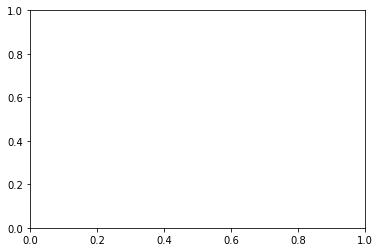

In [56]:
plt.scatter(population['2019'], population['country'])

In [ ]:
ax=plt.subplots(figsize=(14,6))
ax.plot(['2015'], population_brazil['country'])

In [ ]:
plt.bar(urban['country'],urbanização_2015)